## Graficamos la diferencia de residuos pre y post merger vs masa de la gal pre merger

In [1]:
import numpy as np
import pandas as pd
import Curves2D
import matplotlib.pyplot as plt
from scipy import interpolate
from matplotlib import colors
import matplotlib.ticker as ticker

In [2]:
# Tamaño de visualización de los DataFrame

pd.options.display.max_rows = 100
pd.options.display.max_columns = 50

# Escribimos en latex

plt.rcParams['text.usetex'] = False

In [3]:
MEDIANS = pd.DataFrame(columns=['SnapNum','Log(Stars_Mass)','Log(SF_Mass+Stars_Mass)',
                                'Log(Stars_Metallicity/Z_sun)','12+Log(O/H)','SF_Mass/(SF_Mass+Stars_Mass)',
                                'Log(StarFormationRate)','Log(StarFormationRate/Stars_Mass)','R_halfmass30',
                                'KappaCoRot','Log(BlackHoleMass/Stars_Mass)'])

ERROR_MEDIANS = pd.DataFrame(columns=['SnapNum','Log(Stars_Mass)','Log(SF_Mass+Stars_Mass)',
                                'Log(Stars_Metallicity/Z_sun)','12+Log(O/H)','SF_Mass/(SF_Mass+Stars_Mass)',
                                'Log(StarFormationRate)','Log(StarFormationRate/Stars_Mass)','R_halfmass30',
                                'KappaCoRot','Log(BlackHoleMass/Stars_Mass)'])

In [4]:
# Escribimos en latex

plt.rcParams['text.usetex'] = False

## Calculamos las medianas para todas las magnitudes desde el snap 12 en adelante

In [5]:
for snap in np.arange(4,29):

    path ='/home/ramiro/Facultad/Tesis/Datos/Actividad 10/Tabla_para_medianas_RefL0100N1504_snap_'+str(snap)+'.dat'

    DF = pd.read_csv(path)

    VAR = pd.DataFrame(columns=['GalaxyID','SnapNum','Redshift','Log(Stars_Mass)','Log(SF_Mass+Stars_Mass)','Log(Stars_Metallicity/Z_sun)',
                                '12+Log(O/H)','SF_Mass/(SF_Mass+Stars_Mass)','Log(StarFormationRate)',
                                'Log(StarFormationRate/Stars_Mass)','R_halfmass30','Log(BlackHoleMass/Stars_Mass)'])

    VAR['GalaxyID'] = DF['GalaxyID']

    VAR['SnapNum']=DF['SnapNum']
    
    VAR['Redshift']=DF['redshift']

    VAR['Log(Stars_Mass)'] = np.log10(DF['Stars_Mass'])

    VAR['Log(SF_Mass+Stars_Mass)'] = np.log10(DF['SF_Mass']+DF['Stars_Mass'])

    VAR['Log(Stars_Metallicity/Z_sun)'] = np.log10(DF['Stars_Metallicity'])-np.log10(0.02)

    VAR['12+Log(O/H)'] = 12+np.log10(DF['SF_Oxygen']/DF['SF_Hydrogen'])-np.log10(16)
 
    VAR['SF_Mass/(SF_Mass+Stars_Mass)'] = DF['SF_Mass']/(DF['SF_Mass']+DF['Stars_Mass'])

    VAR['Log(StarFormationRate)'] = np.log10(DF['StarFormationRate'])

    VAR['Log(StarFormationRate/Stars_Mass)'] = np.log10(DF['StarFormationRate'])-np.log10(DF['Stars_Mass'])

    VAR['R_halfmass30'] = DF['R_halfmass30']

    VAR['Log(BlackHoleMass/Stars_Mass)'] = np.log10(DF['BlackHoleMass'])-np.log10(DF['Stars_Mass'])

    VAR['KappaCoRot'] = DF['KappaCoRot']

    # Magnitudes a las cuales les vamos a calcular la mediana y lso percentiles
    xvar = [
            VAR['Log(Stars_Mass)'].values,
           ]

    yvar =  [
            VAR['Log(Stars_Mass)'].values,
            VAR['Log(SF_Mass+Stars_Mass)'].values,
            VAR['Log(Stars_Metallicity/Z_sun)'].values,
            VAR['12+Log(O/H)'].values,
            VAR['SF_Mass/(SF_Mass+Stars_Mass)'].values,
            VAR['Log(StarFormationRate)'].values, 
            VAR['Log(StarFormationRate/Stars_Mass)'].values,
            VAR['R_halfmass30'].values,
            VAR['KappaCoRot'].values,
            VAR['Log(BlackHoleMass/Stars_Mass)'].values
            ]

    nbins     = 15    # Numero de bins en variable x a usar para dividir la muestra
    perc_low  = 25.   # Percentil a usar como cota inferior de error
    perc_high = 75.   # Percentil a usar como cota superior de error
    min_count = 10    # Mínima cantidad de elementos para considerar en un bin

    yvar_medians=[]
    yvar_errors=[]

    # Los valores medios y sus percentiles
    for j in np.arange(len(yvar)):
        xmedian,ymedian,xerror,yerror,elements=Curves2D.median_curve(xvar[0],yvar[j],bins=nbins,min_count=min_count,
                                                                     perc_low=perc_low,perc_high=perc_high)
        yvar_medians.append(ymedian)
        yvar_errors.append(yerror)


    mag = pd.Series(yvar_medians)

    mag_errors = pd.Series(yvar_errors)

    lugar = snap
    limite = 0

    # Nos contruimos los dataframaes finales
    
    MEDIANS.loc[lugar-limite,'SnapNum'] = snap
    MEDIANS.at[lugar-limite,'Log(Stars_Mass)'] = mag.iloc[0]
    MEDIANS.at[lugar-limite,'Log(SF_Mass+Stars_Mass)'] = mag.iloc[1]
    MEDIANS.at[lugar-limite,'Log(Stars_Metallicity/Z_sun)'] = mag.iloc[2]
    MEDIANS.at[lugar-limite,'12+Log(O/H)'] = mag.iloc[3]
    MEDIANS.at[lugar-limite,'SF_Mass/(SF_Mass+Stars_Mass)'] = mag.iloc[4]
    MEDIANS.at[lugar-limite,'Log(StarFormationRate)'] = mag.iloc[5]
    MEDIANS.at[lugar-limite,'Log(StarFormationRate/Stars_Mass)'] = mag.iloc[6]
    MEDIANS.at[lugar-limite,'R_halfmass30'] = mag.iloc[7]
    MEDIANS.at[lugar-limite,'KappaCoRot'] = mag.iloc[8]
    MEDIANS.at[lugar-limite,'Log(BlackHoleMass/Stars_Mass)'] = mag.iloc[9]



    ERROR_MEDIANS.loc[lugar-limite,'SnapNum'] = snap
    ERROR_MEDIANS.at[lugar-limite,'Log(Stars_Mass)'] = mag_errors.iloc[0]
    ERROR_MEDIANS.at[lugar-limite,'Log(SF_Mass+Stars_Mass)'] = mag_errors.iloc[1]
    ERROR_MEDIANS.at[lugar-limite,'Log(Stars_Metallicity/Z_sun)'] = mag_errors.iloc[2]
    ERROR_MEDIANS.at[lugar-limite,'12+Log(O/H)'] = mag_errors.iloc[3]
    ERROR_MEDIANS.at[lugar-limite,'SF_Mass/(SF_Mass+Stars_Mass)'] = mag_errors.iloc[4]
    ERROR_MEDIANS.at[lugar-limite,'Log(StarFormationRate)'] = mag_errors.iloc[5]
    ERROR_MEDIANS.at[lugar-limite,'Log(StarFormationRate/Stars_Mass)'] = mag_errors.iloc[6]
    ERROR_MEDIANS.at[lugar-limite,'R_halfmass30'] = mag_errors.iloc[7]
    ERROR_MEDIANS.at[lugar-limite,'KappaCoRot'] = mag_errors.iloc[8]
    ERROR_MEDIANS.at[lugar-limite,'Log(BlackHoleMass/Stars_Mass)'] = mag_errors.iloc[9]

/home/ramiro/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [6]:
# MEDIANS

In [7]:
# ERROR_MEDIANS

## Descargamos los datos de las galxias post y pre mergers

In [8]:
path ='/home/ramiro/Facultad/Tesis/Datos/Actividad 10/'

In [9]:
SUB = pd.read_csv(path+'Subhalo_maxmergers(desde_minor_merger).dat')
SIZ = pd.read_csv(path+'Sizes_maxmergers(desde_minor_merger).dat')
MOR = pd.read_csv(path+'MorphoKinem_maxmergers(desde_minor_merger).dat')
FOF = pd.read_csv(path+'FOF_maxmergers(desde_minor_merger).dat')

In [10]:
# Tiramos filas duplicadas

SIZ = SIZ.drop_duplicates()
MOR = MOR.drop_duplicates()
FOF = FOF.drop_duplicates()

In [11]:
# Armo un dataframe con las variables que usamos para graficar las galaxias que sufrieron mergers
VAR_SUB = pd.DataFrame(columns=['GalaxyID','GroupID','DescendantID','Lm','SnapNum','Redshift','SubGroupNumber','Log(Stars_Mass)','Log(SF_Mass+Stars_Mass)','Log(Stars_Metallicity/Z_sun)',
                                '12+Log(O/H)','SF_Mass/(SF_Mass+Stars_Mass)','Log(StarFormationRate)',
                                'Log(StarFormationRate/Stars_Mass)','Log(BlackHoleMass/Stars_Mass)'])

VAR_SUB['GalaxyID'] = SUB['GalaxyID']
VAR_SUB['DescendantID'] = SUB['DescendantID']
VAR_SUB['GroupID'] = SUB['GroupID']
VAR_SUB['Lm'] = SUB['Lm_max']
VAR_SUB['SnapNum']=SUB['SnapNum']
VAR_SUB['Redshift']=SUB['Redshift']
VAR_SUB['SubGroupNumber'] = SUB['SubGroupNumber']
VAR_SUB['Log(Stars_Mass)'] = np.log10(SUB['Stars_Mass'])
VAR_SUB['Log(SF_Mass+Stars_Mass)'] = np.log10(SUB['SF_Mass']+SUB['Stars_Mass'])
VAR_SUB['Log(Stars_Metallicity/Z_sun)'] = np.log10(SUB['Stars_Metallicity'])-np.log10(0.02)
VAR_SUB['12+Log(O/H)'] = 12+np.log10(SUB['SF_Oxygen']/SUB['SF_Hydrogen'])-np.log10(16)
VAR_SUB['SF_Mass/(SF_Mass+Stars_Mass)'] = SUB['SF_Mass']/(SUB['SF_Mass']+SUB['Stars_Mass'])
VAR_SUB['Log(StarFormationRate)'] = np.log10(SUB['StarFormationRate'])
VAR_SUB['Log(StarFormationRate/Stars_Mass)'] = np.log10(SUB['StarFormationRate'])-np.log10(SUB['Stars_Mass'])
VAR_SUB['Log(BlackHoleMass/Stars_Mass)'] = np.log10(SUB['BlackHoleMass']) - np.log10(SUB['Stars_Mass'])

In [12]:
VAR_SUB.replace([np.inf, -np.inf], np.nan, inplace=True)
VAR_SUB.dropna(inplace=True) 

In [13]:
VAR_MOR = pd.merge(VAR_SUB,MOR)
VAR_SIZ = pd.merge(VAR_SUB,SIZ)
VAR_FOF = pd.merge(VAR_SUB,FOF)

In [14]:
# Definimos la funcion de interpolacion pa el snap n de la variable y
def interpolacion(x_val,y_nom,snap):
    
    mask =(MEDIANS['SnapNum'] == snap)
    x = MEDIANS['Log(Stars_Mass)'][mask].values[0]
    y = MEDIANS[y_nom][mask].values[0]
    f = interpolate.interp1d(x, y)
    return float(f(x_val))

## Contruimos los residuos de las galaxias en el snap anterior al merger

In [15]:
# Listas para los residuos pre y post merger.(0 pre y 1 post)
Res_Mayor   = []
Masas_Mayor = []
Red_Mayor   = []
cuando = 1

for selec in np.arange(0,2):

    # Tabla con nuestras variables para las galaxias que sufrieron mayor mergers(Lm>1.25)

    res_mayor_Log_SMs     = np.array([])
    res_mayor_Log_SF_SMs  = np.array([])
    res_mayor_Log_S_MetZ  = np.array([])
    res_mayor_Log_OH      = np.array([])
    res_mayor_SFfrac      = np.array([])
    res_mayor_Log_SFR     = np.array([])
    res_mayor_Log_sSFR    = np.array([])
    res_mayor_Log_BH      = np.array([])
    res_mayor_RHM30       = np.array([])
    res_mayor_KcRot       = np.array([])
    Log_Star_mass_pre_sub = np.array([])
    Red_merger_sub        = np.array([])
    Log_Star_mass_pre_siz = np.array([])
    Red_merger_siz        = np.array([])
    Log_Star_mass_pre_mor = np.array([])
    Red_merger_mor        = np.array([])

    for i in np.arange(0,int(len(VAR_SUB))-1):
        
        mask_ID = (VAR_SUB['SnapNum']>=12)&(VAR_SUB['Lm'] >=1.25)&(VAR_SUB['Lm'] == VAR_SUB['Lm'].iloc[i])&((VAR_SUB['DescendantID'] == VAR_SUB['GalaxyID'].iloc[i+1])|(VAR_SUB['GalaxyID'] == VAR_SUB['DescendantID'].iloc[i])) #Nos aseguramos que restemos progenitor con descendiente
    
        if len(VAR_SUB[mask_ID])==int(2):
          
            snap = int(VAR_SUB[mask_ID]['SnapNum'].values[selec])# El snap de la galaxia que estamos analizando
            x_val= float(VAR_SUB[mask_ID]['Log(Stars_Mass)'].values[selec]) # log de la masa de la galaxia
            #Condiciones para poder interpolar sin problemas
            snap_l1 = VAR_SUB[mask_ID]['SnapNum'].values[0]
            snap_l2 = VAR_SUB[mask_ID]['SnapNum'].values[1]
            x_val_l1= VAR_SUB[mask_ID]['Log(Stars_Mass)'].values[0]
            x_val_l2= VAR_SUB[mask_ID]['Log(Stars_Mass)'].values[1]
            
            mask_snap_l1 = (MEDIANS['SnapNum'] == snap_l1)
            mask_snap_l2 = (MEDIANS['SnapNum'] == snap_l2)
            
            x_med_min_l1 = min(MEDIANS['Log(Stars_Mass)'][mask_snap_l1].values[0])
            x_med_max_l1 = max(MEDIANS['Log(Stars_Mass)'][mask_snap_l1].values[0])
            x_med_min_l2 = min(MEDIANS['Log(Stars_Mass)'][mask_snap_l2].values[0])
            x_med_max_l2 = max(MEDIANS['Log(Stars_Mass)'][mask_snap_l2].values[0])
        
            if ((x_val_l1<x_med_max_l1)and(x_val_l1>x_med_min_l1)and(x_val_l2<x_med_max_l2)and(x_val_l2>x_med_min_l2)):                    
                    
                    res_mayor_Log_SMs   = np.append(res_mayor_Log_SMs, VAR_SUB[mask_ID]['Log(Stars_Mass)'].values[selec] - interpolacion(x_val=x_val,y_nom='Log(Stars_Mass)',snap=snap))
                    res_mayor_Log_SF_SMs= np.append(res_mayor_Log_SF_SMs, VAR_SUB[mask_ID]['Log(SF_Mass+Stars_Mass)'].values[selec] - interpolacion(x_val=x_val,y_nom='Log(SF_Mass+Stars_Mass)',snap=snap))
                    res_mayor_Log_S_MetZ= np.append(res_mayor_Log_S_MetZ, VAR_SUB[mask_ID]['Log(Stars_Metallicity/Z_sun)'].values[selec] - interpolacion(x_val=x_val,y_nom='Log(Stars_Metallicity/Z_sun)',snap=snap))
                    res_mayor_Log_OH    = np.append(res_mayor_Log_OH, VAR_SUB[mask_ID]['12+Log(O/H)'].values[selec] - interpolacion(x_val=x_val,y_nom='12+Log(O/H)',snap=snap))
                    res_mayor_SFfrac    = np.append(res_mayor_SFfrac, VAR_SUB[mask_ID]['SF_Mass/(SF_Mass+Stars_Mass)'].values[selec] - interpolacion(x_val=x_val,y_nom='SF_Mass/(SF_Mass+Stars_Mass)',snap=snap))
                    res_mayor_Log_SFR   = np.append(res_mayor_Log_SFR, VAR_SUB[mask_ID]['Log(StarFormationRate)'].values[selec] - interpolacion(x_val=x_val,y_nom='Log(StarFormationRate)',snap=snap))
                    res_mayor_Log_sSFR  = np.append(res_mayor_Log_sSFR, VAR_SUB[mask_ID]['Log(StarFormationRate/Stars_Mass)'].values[selec] - interpolacion(x_val=x_val,y_nom='Log(StarFormationRate/Stars_Mass)',snap=snap))
                    res_mayor_Log_BH    = np.append(res_mayor_Log_BH, VAR_SUB[mask_ID]['Log(BlackHoleMass/Stars_Mass)'].values[selec] - interpolacion(x_val=x_val,y_nom='Log(BlackHoleMass/Stars_Mass)',snap=snap))
                    #Agregamos info de las masa pre merger y el snap de merger
                    Log_Star_mass_pre_sub= np.append(Log_Star_mass_pre_sub,VAR_SUB[mask_ID]['Log(Stars_Mass)'].values[cuando])
                    Red_merger_sub       = np.append(Red_merger_sub,VAR_SUB[mask_ID]['Redshift'].values[1])
                    
    for i in np.arange(0,len(VAR_SIZ)-1):
    
        mask_ID = (VAR_SIZ['SnapNum']>=12)&(VAR_SIZ['Lm'] >=1.25)&(VAR_SIZ['Lm'] == VAR_SIZ['Lm'].iloc[i+1])&((VAR_SIZ['DescendantID'] == VAR_SIZ['GalaxyID'].iloc[i+1])|(VAR_SIZ['GalaxyID'] == VAR_SIZ['DescendantID'].iloc[i])) #Nos aseguramos que restemos progenitor con descendiente
    
        if len(VAR_SIZ[mask_ID])==int(2):
        
            snap = int(VAR_SIZ[mask_ID]['SnapNum'].values[selec])# El snap de la galaxia que estamos analizando
            x_val= float(VAR_SIZ[mask_ID]['Log(Stars_Mass)'].values[selec]) # log de la masa de la galaxia
            #Condiciones para poder interpolar sin problemas
            snap_l1 = VAR_SIZ[mask_ID]['SnapNum'].values[0]
            snap_l2 = VAR_SIZ[mask_ID]['SnapNum'].values[1]
            x_val_l1= VAR_SIZ[mask_ID]['Log(Stars_Mass)'].values[0]
            x_val_l2= VAR_SIZ[mask_ID]['Log(Stars_Mass)'].values[1]
            
            mask_snap_l1 = (MEDIANS['SnapNum'] == snap_l1)
            mask_snap_l2 = (MEDIANS['SnapNum'] == snap_l2)
            
            x_med_min_l1 = min(MEDIANS['Log(Stars_Mass)'][mask_snap_l1].values[0])
            x_med_max_l1 = max(MEDIANS['Log(Stars_Mass)'][mask_snap_l1].values[0])
            x_med_min_l2 = min(MEDIANS['Log(Stars_Mass)'][mask_snap_l2].values[0])
            x_med_max_l2 = max(MEDIANS['Log(Stars_Mass)'][mask_snap_l2].values[0])
        
            if ((x_val_l1<x_med_max_l1)and(x_val_l1>x_med_min_l1)and(x_val_l2<x_med_max_l2)and(x_val_l2>x_med_min_l2)):     
                
                res_mayor_RHM30=np.append(res_mayor_RHM30,VAR_SIZ[mask_ID]['R_halfmass30'].values[selec] - interpolacion(x_val=x_val,y_nom='R_halfmass30',snap=snap))
                #Agregamos info de las masa pre merger y el snap de merger
                Log_Star_mass_pre_siz= np.append(Log_Star_mass_pre_siz,VAR_SIZ[mask_ID]['Log(Stars_Mass)'].values[cuando])
                Red_merger_siz       = np.append(Red_merger_siz,VAR_SIZ[mask_ID]['Redshift'].values[1])
    
    for i in np.arange(0,len(VAR_MOR)-1):
    
        mask_ID = (VAR_MOR['SnapNum']>=12)&(VAR_MOR['Lm'] >=1.25)&(VAR_MOR['Lm'] == VAR_MOR['Lm'].iloc[i+1])&((VAR_MOR['DescendantID'] == VAR_MOR['GalaxyID'].iloc[i+1])|(VAR_MOR['GalaxyID'] == VAR_MOR['DescendantID'].iloc[i])) #Nos aseguramos que restemos progenitor con descendiente
    
        if len(VAR_MOR[mask_ID])==int(2):
        
            snap = int(VAR_MOR[mask_ID]['SnapNum'].values[selec])# El snap de la galaxia que estamos analizando
            x_val= float(VAR_MOR[mask_ID]['Log(Stars_Mass)'].values[selec]) # log de la masa de la galaxia
            #Condiciones para poder interpolar sin problemas
            snap_l1 = VAR_MOR[mask_ID]['SnapNum'].values[0]
            snap_l2 = VAR_MOR[mask_ID]['SnapNum'].values[1]
            x_val_l1= VAR_MOR[mask_ID]['Log(Stars_Mass)'].values[0]
            x_val_l2= VAR_MOR[mask_ID]['Log(Stars_Mass)'].values[1]
            
            mask_snap_l1 = (MEDIANS['SnapNum'] == snap_l1)
            mask_snap_l2 = (MEDIANS['SnapNum'] == snap_l2)
            
            x_med_min_l1 = min(MEDIANS['Log(Stars_Mass)'][mask_snap_l1].values[0])
            x_med_max_l1 = max(MEDIANS['Log(Stars_Mass)'][mask_snap_l1].values[0])
            x_med_min_l2 = min(MEDIANS['Log(Stars_Mass)'][mask_snap_l2].values[0])
            x_med_max_l2 = max(MEDIANS['Log(Stars_Mass)'][mask_snap_l2].values[0])
        
            if ((x_val_l1<x_med_max_l1)and(x_val_l1>x_med_min_l1)and(x_val_l2<x_med_max_l2)and(x_val_l2>x_med_min_l2)):     
                    res_mayor_KcRot=np.append(res_mayor_KcRot,VAR_MOR[mask_ID]['KappaCoRot'].values[selec] - interpolacion(x_val=x_val,y_nom='KappaCoRot',snap=snap))
                    #Agregamos info de las masa pre merger y el snap de merger
                    Log_Star_mass_pre_mor= np.append(Log_Star_mass_pre_mor,VAR_MOR[mask_ID]['Log(Stars_Mass)'].values[cuando])
                    Red_merger_mor       = np.append(Red_merger_mor,VAR_MOR[mask_ID]['Redshift'].values[1])  
                    
    dif_mayor = [res_mayor_Log_SMs, res_mayor_Log_SF_SMs, res_mayor_Log_S_MetZ, res_mayor_Log_OH, res_mayor_SFfrac, 
                 res_mayor_Log_SFR, res_mayor_Log_sSFR, res_mayor_Log_BH, res_mayor_RHM30, res_mayor_KcRot]
    
    masa_mayor = [Log_Star_mass_pre_sub,Log_Star_mass_pre_siz,Log_Star_mass_pre_mor]
    
    red_mayor  = [Red_merger_sub,Red_merger_siz,Red_merger_mor]
                 
    Res_Mayor.append(dif_mayor)

In [16]:
xvar = [
        masa_mayor[0],                 #r'${\Delta}Log(M_\bigstar)[\rm{M}_\odot]$'
        masa_mayor[0],                 #r'${\Delta}Log(M_{SFgas}+M_\bigstar)[\rm{M}_\odot]$'
        masa_mayor[0],                 #r'${\Delta}Log(Z_{\bigstar}/Z_{\odot})$'
        masa_mayor[0],                 #r'${\Delta}(12+Log(O/H))$'
        masa_mayor[0],                 #r'${\Delta}(F_{SFgas})$'
        masa_mayor[0],                 #r'${\Delta}Log(SFR)$'
        masa_mayor[0],                 #r'${\Delta}Log(sSFR)$'
        masa_mayor[1],                 #r'${\Delta}Log(M_{BH}/M_{\bigstar})[\rm{M}_\odot]$'
        masa_mayor[1],                 #r'${\Delta}RHM30$'
        masa_mayor[2]                  #r'${\Delta}\kappa_{co}$'
       ]

yvar = [
        abs(Res_Mayor[1][0]-Res_Mayor[0][0]),      #r'${\Delta}Log(M_\bigstar)[\rm{M}_\odot]$'
        abs(Res_Mayor[1][1]-Res_Mayor[0][1]),      #r'${\Delta}Log(M_{SFgas}+M_\bigstar)[\rm{M}_\odot]$'
        abs(Res_Mayor[1][2]-Res_Mayor[0][2]),      #r'${\Delta}Log(Z_{\bigstar}/Z_{\odot})$'
        abs(Res_Mayor[1][3]-Res_Mayor[0][3]),      #r'${\Delta}(12+Log(O/H))$'
        abs(Res_Mayor[1][4]-Res_Mayor[0][4]),      #r'${\Delta}(F_{SFgas})$'
        abs(Res_Mayor[1][5]-Res_Mayor[0][5]),      #r'${\Delta}Log(SFR)$'
        Res_Mayor[1][6]-Res_Mayor[0][6],      #r'${\Delta}Log(sSFR)$'
        Res_Mayor[1][7]-Res_Mayor[0][7],      #r'${\Delta}Log(M_{BH}/M_{\bigstar})[\rm{M}_\odot]$'
        Res_Mayor[1][8]-Res_Mayor[0][8],      #r'${\Delta}RHM30$'
        Res_Mayor[1][9]-Res_Mayor[0][9]       #r'${\Delta}\kappa_{co}$'
       ]

zvar = [
        red_mayor[0],       #r'${\Delta}Log(M_\bigstar)[\rm{M}_\odot]$'
        red_mayor[0],       #r'${\Delta}Log(M_{SFgas}+M_\bigstar)[\rm{M}_\odot]$'
        red_mayor[0],       #r'${\Delta}Log(Z_{\bigstar}/Z_{\odot})$'
        red_mayor[0],       #r'${\Delta}(12+Log(O/H))$'
        red_mayor[0],       #r'${\Delta}(F_{SFgas})$'
        red_mayor[0],       #r'${\Delta}Log(SFR)$'
        red_mayor[0],       #r'${\Delta}Log(sSFR)$'
        red_mayor[0],       #r'${\Delta}Log(M_{BH}/M_{\bigstar})[\rm{M}_\odot]$'
        red_mayor[1],       #r'${\Delta}RHM30$'
        red_mayor[2]        #r'${\Delta}\kappa_{co}$'
        ]


xlabels = [r'$Log(M_\bigstar)[\rm{M}_\odot]$']

ylabels = [
            r'${\Delta}Log(M_\bigstar)[\rm{M}_\odot]$',
            r'${\Delta}Log(M_{SFgas}+M_\bigstar)[\rm{M}_\odot]$',
            r'${\Delta}Log(Z_{\bigstar}/Z_{\odot})$',
            r'${\Delta}(12+Log(O/H))$',
            r'${\Delta}(F_{SFgas})$',
            r'${\Delta}Log(SFR)$',
            r'${\Delta}Log(sSFR)$',
            r'${\Delta}Log(M_{BH}/M_{\bigstar})[\rm{M}_\odot]$',
            r'${\Delta}RHM30$',
            r'${\Delta}\kappa_{co}$'
         ]

<ipython-input-17-1562b3d0ed22>:24: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))
  cmap.set_under('k')    # Color por debajo de mínimo
<ipython-input-17-1562b3d0ed22>:24: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))
  cmap.set_under('k')    # Color por debajo de mínimo
<ipython-input-17-1562b3d0ed22>:24: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make

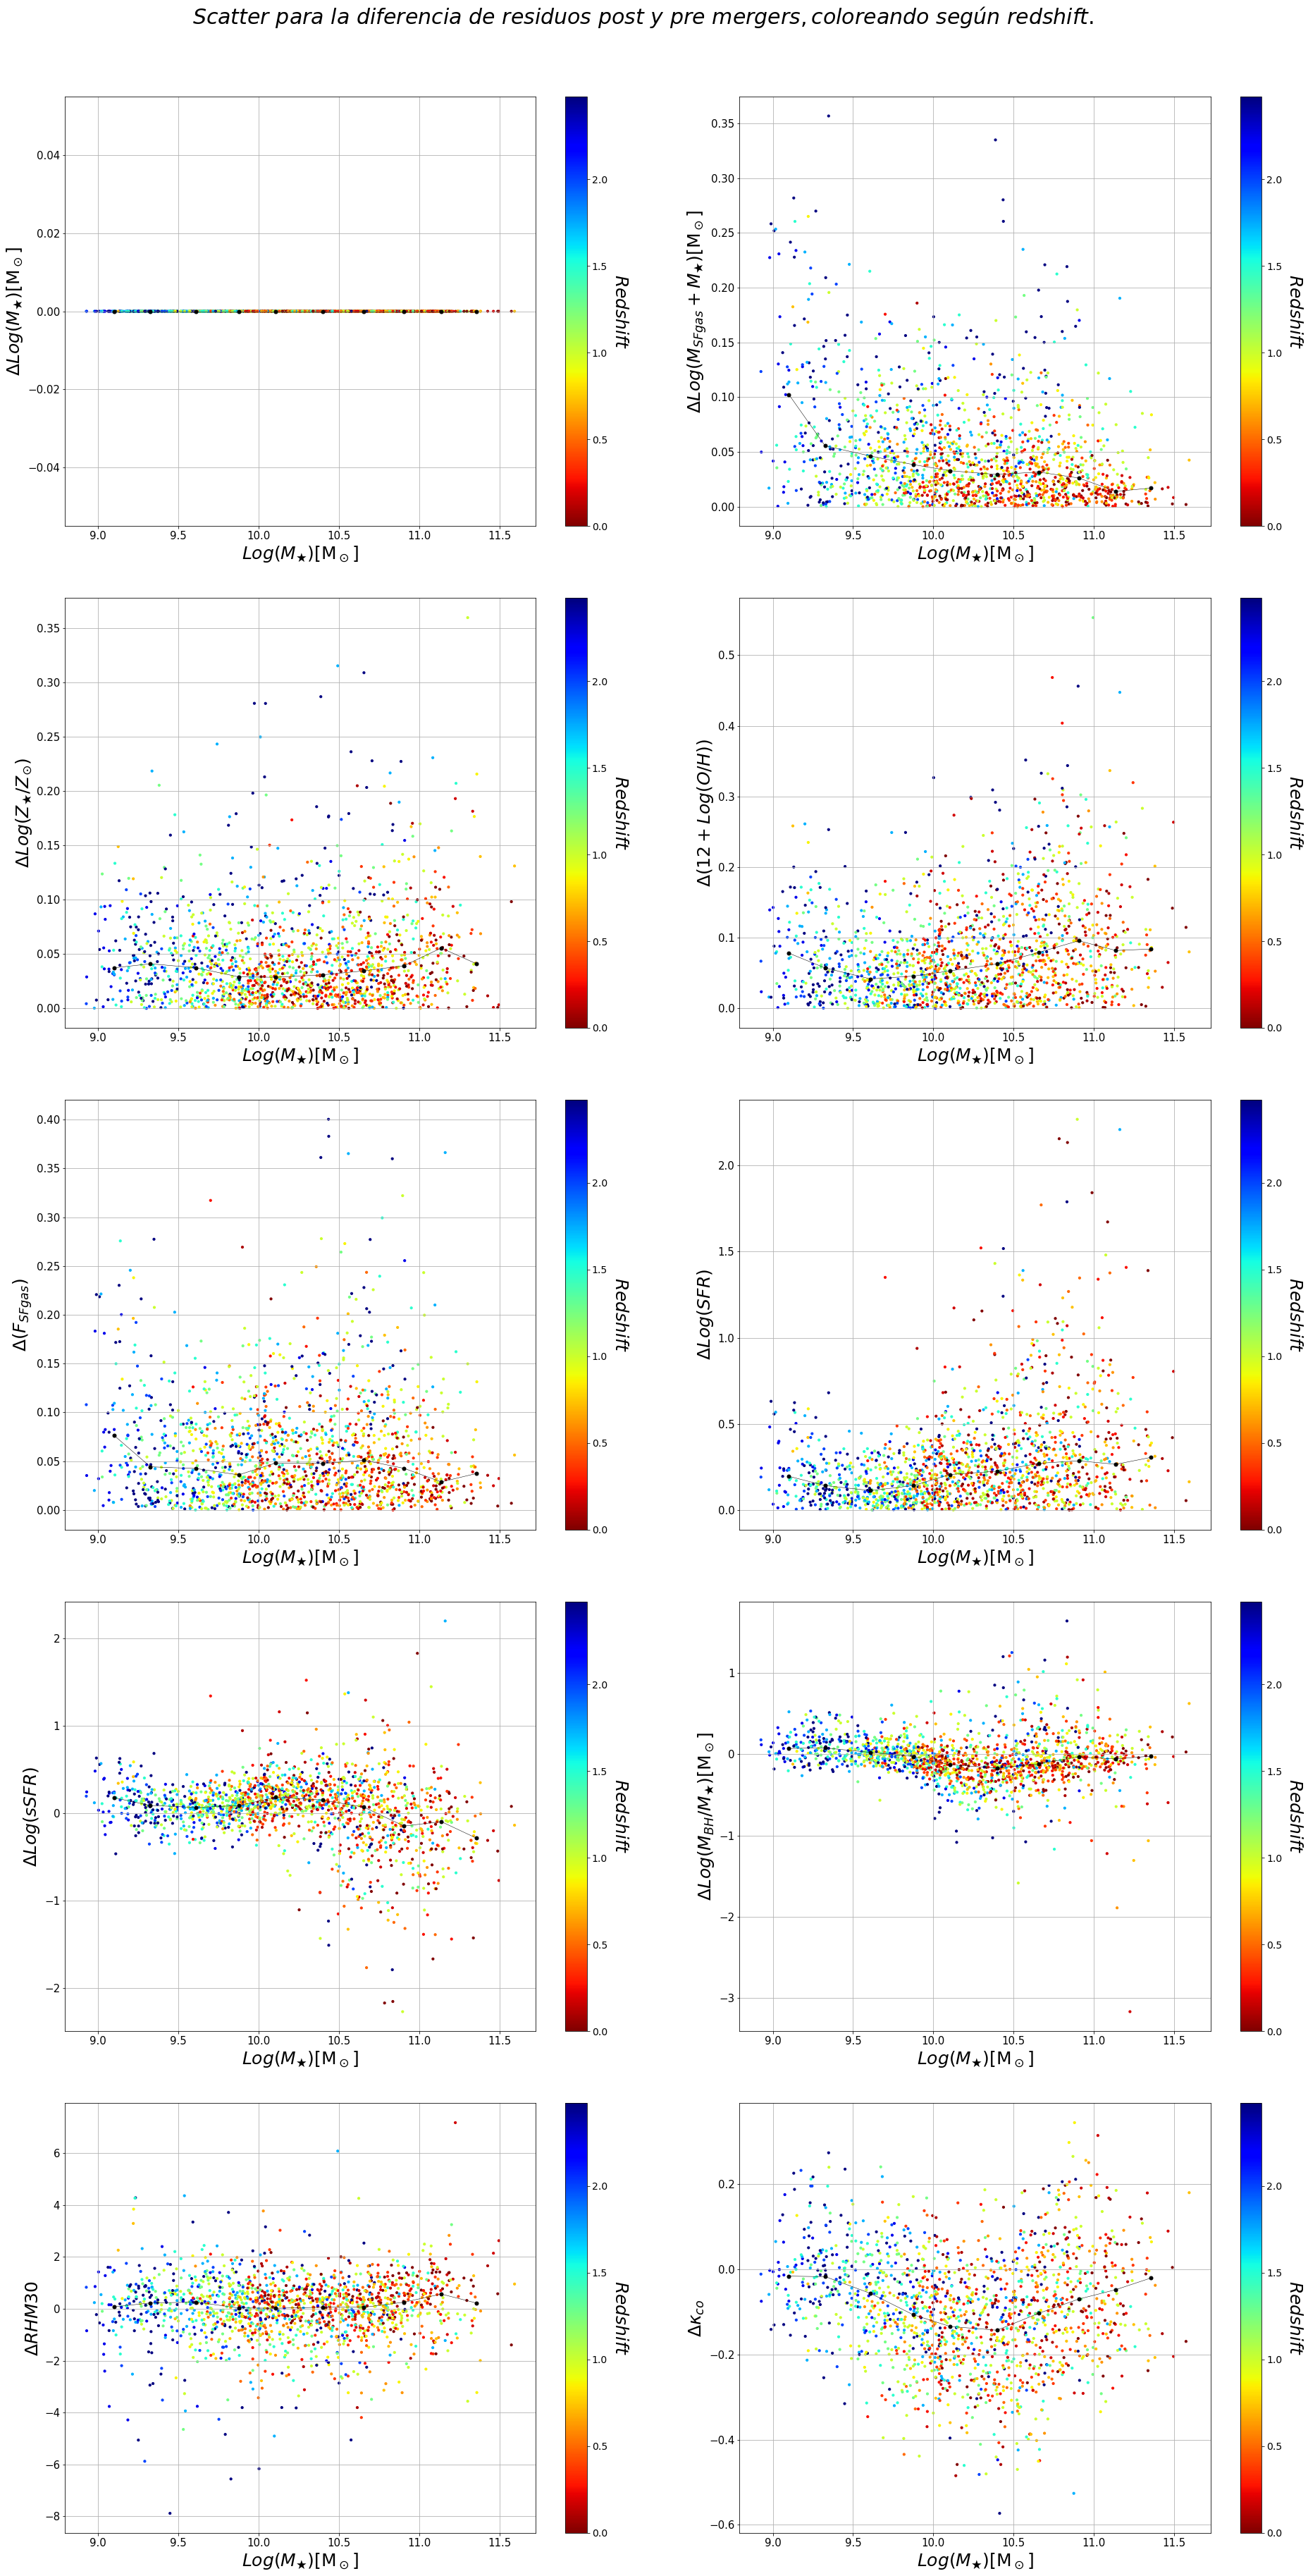

In [17]:
fig,ax = plt.subplots(5,2,figsize=(30,60))
ax = ax.flatten() # Convertimos a ax en una array plano para recorrerlo tranqui con un for 

fig.tight_layout(pad=10.0)

fontdict ={'fontsize': 30}

fig.suptitle(r'$Scatter\ para\ la\ diferencia\ de\ residuos\ post\ y\ pre\ mergers, coloreando\ según\ redshift.$', fontsize=30)

# Para el calculo de las medianas

nbins=10        # Numero de bins en variable x a usar para dividir la muestra
perc_low=25.        # Percentil a usar como cota inferior de error
perc_high=75.       # Percentil a usar como cota superior de error
min_count=5         # Mínima cantidad de elementos para considerar en un bin

i=0
for varx,vary,varz,labely in zip(xvar,yvar,zvar,ylabels):
   
        #PARTE DE DEFINICIONES PARA COLOREAR
        # Colors representing some property  
        # Define colormap to use
        cmap = plt.get_cmap('jet_r')    # Add _r to the name of colormap to invert it.    
        cmap.set_under('k')    # Color por debajo de mínimo

        # Propiedad a usar para colorear
        # Ojo!! Acá depende de la propiedad si tomar o no log10...
        # colors_var_key='Mass_Star'
        colors_var_label=r'$Redshift$'
#         if i < 8: 
#             colors_var = zvar[0]
#         elif i == 8:
#             colors_var = zvar[1]
#         else: colors_var = zvar[2]
        colors_var = varz
                                   
        #---------------------------------------------------------------
        # Esto es en caso de que se tome log y la variable para colorear sea cero
        # En estos casos, se asigna el color negro (con el 'set_under' del principio)
        mask_color=~(np.logical_or(np.isinf(colors_var),np.isnan(colors_var)))
        #---------------------------------------------------------------

        # Escaleo los colores "a mano". Es una escala lineal.
        vmin=min(colors_var[mask_color])
        vmax=max(colors_var[mask_color])
        a=1./float(vmax-vmin)
        b=-a*vmin
        colorss=(a*colors_var+b)   # Array de números que representan colores
        facecolor=cmap(colorss)    # Esto transforma "números" a 4-tuplas que representan colores
        
        
        # Scatter plot 'falso', para armar barra de referencia
        sc_bar=ax[i].scatter(varx,vary,c=colorss,vmin=vmin,vmax=vmax,cmap=cmap,s=0)
        # Agrego barra de referencia para colres
        cbar=fig.colorbar(mappable=sc_bar,ax=ax[i],orientation='vertical')
        cbar.set_label(colors_var_label,fontsize=25,rotation=270,labelpad=30)
        cbar.ax.tick_params(labelsize=14)
        
        #Medianas
        xmedian,ymedian,xerror,yerror,elements=Curves2D.median_curve(varx,vary,bins=nbins,min_count=min_count,perc_low=perc_low,perc_high=perc_high)
        ax[i].plot(xmedian,ymedian,c='k',marker='o',ms=5,linestyle='-',linewidth=0.5,label='Mediana')

        
        #PARTE DE SCATTER
                        
        xlim=(min(varx)-0.05*abs(min(varx)),max(varx)+0.05*abs(max(varx)))
        ylim=(min(vary)-0.05*abs(min(vary)),max(vary)+0.05*abs(max(vary)))

        ax[i].set_xlabel(str(xlabels[0]),fontsize=25)
        ax[i].set_ylabel(labely,fontsize=25)

        ax[i].tick_params(axis='both', which='major', labelsize=15)
        
        # Scatter coloreado y dimensionado
        ax[i].scatter(varx,vary,marker='o',c=facecolor,s=10)
   
        plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

        ax[i].grid()
        i=i+1
# plt.savefig('dif_residuos_postmerger.pdf')
plt.show()

## Color maps

In [18]:
xvar = [
#         masa_mayor[0],                 #r'${\Delta}Log(M_{SFgas}+M_\bigstar)[\rm{M}_\odot]$'
        masa_mayor[0],                 #r'${\Delta}Log(Z_{\bigstar}/Z_{\odot})$'
        masa_mayor[0],                 #r'${\Delta}(12+Log(O/H))$'
        masa_mayor[0],                 #r'${\Delta}(F_{SFgas})$'
#         masa_mayor[0],                 #r'${\Delta}Log(SFR)$'
        masa_mayor[0],                 #r'${\Delta}Log(sSFR)$'
        masa_mayor[1],                 #r'${\Delta}Log(M_{BH}/M_{\bigstar})[\rm{M}_\odot]$'
#         masa_mayor[1],                 #r'${\Delta}RHM30$'
        masa_mayor[2]                  #r'${\Delta}\kappa_{co}$'
       ]

yvar = [
#         Res_Mayor[1][1]-Res_Mayor[0][1],      #r'${\Delta}Log(M_{SFgas}+M_\bigstar)[\rm{M}_\odot]$'
        abs(Res_Mayor[1][2]-Res_Mayor[0][2]),      #r'${\Delta}Log(Z_{\bigstar}/Z_{\odot})$'
        abs(Res_Mayor[1][3]-Res_Mayor[0][3]),      #r'${\Delta}(12+Log(O/H))$'
        abs(Res_Mayor[1][4]-Res_Mayor[0][4]),      #r'${\Delta}(F_{SFgas})$'
#         Res_Mayor[1][5]-Res_Mayor[0][5],      #r'${\Delta}Log(SFR)$'
        abs(Res_Mayor[1][6]-Res_Mayor[0][6]),      #r'${\Delta}Log(sSFR)$'
        abs(Res_Mayor[1][7]-Res_Mayor[0][7]),      #r'${\Delta}Log(M_{BH}/M_{\bigstar})[\rm{M}_\odot]$'
#         Res_Mayor[1][8]-Res_Mayor[0][8],      #r'${\Delta}RHM30$'
        abs(Res_Mayor[1][9]-Res_Mayor[0][9])       #r'${\Delta}\kappa_{co}$'
       ]

zvar = [
#         red_mayor[0],       #r'${\Delta}Log(M_{SFgas}+M_\bigstar)[\rm{M}_\odot]$'
        red_mayor[0],       #r'${\Delta}Log(Z_{\bigstar}/Z_{\odot})$'
        red_mayor[0],       #r'${\Delta}(12+Log(O/H))$'
        red_mayor[0],       #r'${\Delta}(F_{SFgas})$'
#         red_mayor[0],       #r'${\Delta}Log(SFR)$'
        red_mayor[0],       #r'${\Delta}Log(sSFR)$'
        red_mayor[0],       #r'${\Delta}Log(M_{BH}/M_{\bigstar})[\rm{M}_\odot]$'
#         red_mayor[1],       #r'${\Delta}RHM30$'
        red_mayor[2]        #r'${\Delta}\kappa_{co}$'
        ]


xlabels = [r'$Post~log(M_\bigstar)[\rm{M}_\odot]$']

ylabels = [
#             r'${\Delta}Log(M_{SFgas}+M_\bigstar)[\rm{M}_\odot]$',
            r'$|{\Delta}Res~log(Z_{\bigstar}/Z_{\odot})|$',
            r'$|{\Delta}Res~(12+log(O/H))|$',
            r'$|{\Delta}Res~(F_{SFgas})|$',
#             r'${\Delta}Log(SFR)$',
            r'$|{\Delta}Res~log(sSFR)~[yr^{-1}]|$',
            r'$|{\Delta}Res~log(M_{BH}/M_{\bigstar})[\rm{M}_\odot]|$',
#             r'${\Delta}RHM30$',
            r'$|{\Delta}Res~\kappa_{co}|$'
         ]

limitesx = [
#             [8.75,11.75],    #log(M_{SFgas}+M_{\bigstar})[\rm{M}_\odot]$'
            [8.75,11.5],      #log(Z_{Star}/Z_{Sun})$'
            [8.75,11.5],     #12+log(O/H)$'
            [8.75,11.5],      #F_{SFgas}$
#             [8.75,11.75],          #log(SFR)
            [8.75,11.5],          #log(sSFR)
            [8.75,11.5],          #log(M_{BH}/M_{\bigstar})
#             [8.75,11.75],          #RHM30
            [8.75,11.5]       #kappa
           ]
# limitesy = [
# #             [-0.22,0.3],    #log(M_{SFgas}+M_{\bigstar})[\rm{M}_\odot]$'
#             [-0.23,0.28],      #log(Z_{Star}/Z_{Sun})$'
#             [-0.3,0.47],     #12+log(O/H)$'
#             [-0.3,0.32],      #F_{SFgas}$
# #             [-1.2,1.2],          #log(SFR)
#             [-1.5,2.1],          #log(sSFR)
#             [-1,1.5],          #log(M_{BH}/M_{\bigstar})
# #             [-3,4],          #RHM30
#             [-0.6,0.4]       #kappa
#            ]


# Límite en y de prueba


limitesy = [
#             [-0.22,0.3],    #log(M_{SFgas}+M_{\bigstar})[\rm{M}_\odot]$'
            [0,0.15],      #log(Z_{Star}/Z_{Sun})$'
            [0,0.25],     #12+log(O/H)$'
            [0,0.19],      #F_{SFgas}$
#             [-1.2,1.2],          #log(SFR)
            [0,0.65],          #log(sSFR)
            [0,0.6],          #log(M_{BH}/M_{\bigstar})
#             [-3,4],          #RHM30
            [0,0.45]       #kappa
           ]

<ipython-input-19-c31f1bd8bee8>:63: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if (var_color==[]) or (statistic=='counts'):
<ipython-input-19-c31f1bd8bee8>:133: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))
  cmap.set_under('white')                      # "bad-defined" bins will be of colour white.
<ipython-input-19-c31f1bd8bee8>:152: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if (var_color==[]) or (statistic=='counts'):   # Format the string of color bar ticks label
<ipython-input-19-c31f1bd8bee8>:63: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if (var_color==[]) or (statistic=='counts'):
<ipython-input

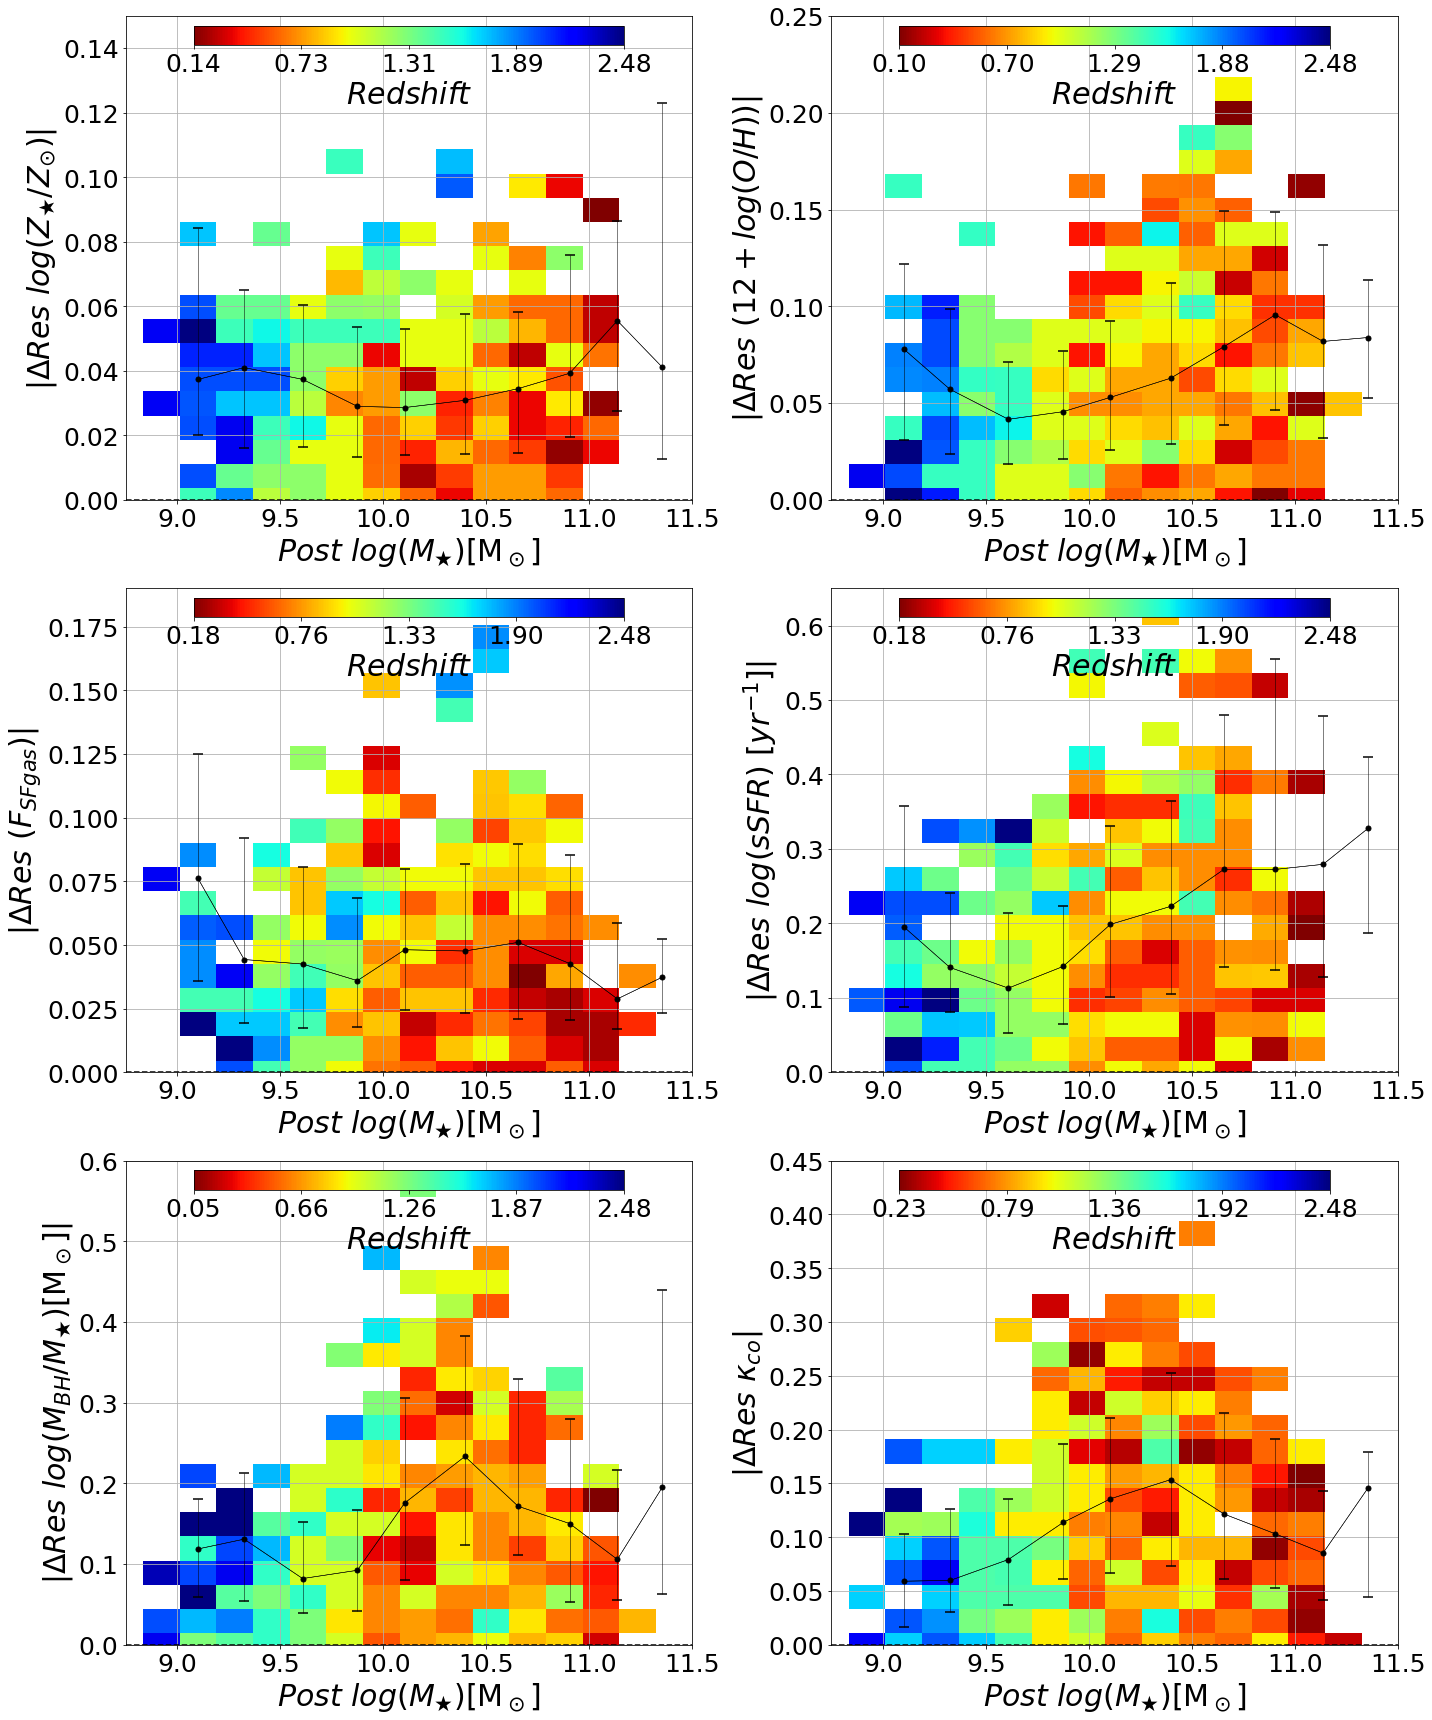

In [19]:
fig,ax = plt.subplots(3,2,figsize=(20,24))
ax = ax.flatten() # Convertimos a ax en una array plano para recorrerlo tranqui con un for 

fig.tight_layout(pad=10.0)

fontdict ={'fontsize': 30}

# fig.suptitle(r'$Scatter\ para\ la\ diferencia\ de\ magnitudes\ post\ y\ pre\ mergers, coloreando\ según\ redshift\ y\ tamaños\ según\ la\ masa\ pre\ merger.$', fontsize=30)

# Para el calculo de las medianas

nbins=10        # Numero de bins en variable x a usar para dividir la muestra
perc_low=25.        # Percentil a usar como cota inferior de error
perc_high=75.       # Percentil a usar como cota superior de error
min_count=10         # Mínima cantidad de elementos para considerar en un bin

k=0
for varx,vary,labely,varz in zip(xvar,yvar,ylabels,zvar):

        # Parámetro que colorea
        parametro= varz

        # Variables (ejes) a graficar
        xplot = varx
        yplot = vary

        xlabel= xlabels[0]
        ylabel= labely

        xmedian,ymedian,xerror,yerror,elements=Curves2D.median_curve(xplot,yplot,bins=nbins,min_count=min_count,perc_low=perc_low,perc_high=perc_high)

        #-------------------- Variables para pintar grilla 2D-----------------------------------------------
        # Variable a usar para colorear
        var_color= parametro

        # Estadístico a usar ('counts','mean','median')
        statistic='median'

        # 'counts' es para contar el número de galaxias en cada bin (digamos, es para hacer un histograma2D)
        # 'mean' y 'median' son para calcular la media o la mediana de var en cada bin.

        # Label to use in color bar reference
        var_label=r'$Redshift$'

        # Número de bines en cada eje
        nbinsx=15
        nbinsy=20

        # Minimum number of galaxies to color bin (bins with less galaxies than this value will
        # not be taken into account)
        cmin=4

        # Color map to use. Use 'mapname_r' to invert colours. For example, if want to
        # invert the color map "jet", use "jet_r".
        cmap='jet_r'


        # Intervals of binning, as function of nbinsx and nbinsy:
        intx=(max(xplot)-min(xplot))/nbinsx
        inty=(max(limitesy[k])-min(limitesy[k]))/nbinsy

        # If 'var_color' is an empty sequence or 'statistic=='counts'', plot a 2D histogram. 
        if (var_color==[]) or (statistic=='counts'):   
            # Min and Max of each variable
            xmin,xmax=min(xplot),max(xplot)
            xlim=[xmin,xmax]

            ymin,ymax = min(limitesy[k]),max(limitesy[k])
            ylim = [ymin,ymax]
        
            # Construct the 2D histogram
            hist2d,xedges,yedges,im=ax[k].hist2d(xplot, yplot, bins=(nbinsx,nbinsy),cmap=cmap,
                                              range=(xlim,ylim),cmin=cmin)
            var_label='N'
        
         # If not want to plot a 2D histogram, construct the color map
        else:
         #Define a "density" array of 2x2 used for binning. Its elements will be the values of the statistic
                    density=np.zeros((nbinsy+1,nbinsx+1))    # NOTE THE TRANSPOSITION OF AXIS! It is done like this in
                                                             # order to use 'meshgrid' later.

                    # Calculate the desired statistic in each bin
                    auxx=min(xplot)
                    for i in range(nbinsx+1):
                        auxy=min(yplot)
                        for j in range(nbinsy+1):
                            # Select data of elements that belong to the bin
                            var=var_color[(xplot >= auxx) & (xplot < auxx+intx) & (yplot >= auxy) & (yplot < auxy+inty)]
                            # Calculate the statistic in the bin, if there are at least cmin elements inside the bin.
                            if (var.size >=cmin):
                                if statistic=='mean':
                                    stat_val=np.mean(var)
                                elif statistic=='median':
                                    stat_val=np.median(var)                        
                            # If not enough elements in the bin, assign the value -1e99 to the statistic        
                            else:
                                stat_val=-1e99
                
                            # Overwrite the [j,i] element (bin) of density array with the calculated statistic
                            density[j,i]=stat_val
                            auxy=auxy+inty
                        auxx=auxx+intx

                    # Define x-coordinates of 2D grid
                    x=np.zeros(nbinsx+1)
                    auxx=min(xplot)
                    for i in range(nbinsx+1):
                        x[i]=auxx
                        auxx=auxx+intx

                    # Define y-coordinates of 2D grid
                    y=np.zeros(nbinsy+1)
                    auxy=min(yplot)
                    for j in range(nbinsy+1):
                        y[j]=auxy
                        auxy=auxy+inty

                    # Construct two 2D array with grid coordinates
                    x,y=np.meshgrid(x,y)

                    # Define again the density (statistic) array
                    z=density

                    # IMPORTANT!!: x, y, z MUST have the same shape.

                    # Search min and max of statistic, considering only bins with "well-defined" statistic
                    densitylim=density[density > -1e99]
                    vmin=np.amin(densitylim)
                    vmax=np.amax(densitylim)
 
                    # Prepare the color map
                    cmap = plt.get_cmap(cmap)       # Name of the color map
                    cmap.set_under('white')                      # "bad-defined" bins will be of colour white. 
                    norm = colors.Normalize(vmin=vmin, vmax=vmax, clip=False)    # Normalize colors to the interval (vmin,vmax)

                    # Construct color grid
                    im=ax[k].pcolormesh(x,y,z,cmap=cmap,norm=norm,shading='auto')                     

        # Barra de referencia y "tuneo" del gráfico
        # Add an axis that will contain the color bar 
        cbaxes=ax[k].inset_axes([0.12,0.94,0.76,0.04]) 

        # Construct color bar using the color grid (object 'im')
        cbar=plt.colorbar(im,cax=cbaxes,orientation='horizontal')   
        cbar.set_label(var_label,fontsize=30)    # Label of color bar
        cbaxes.tick_params(axis='both', which='major', labelsize=25)   # Size of ticks labels

        # Number of ticks in color bar
        loc = ticker.LinearLocator(numticks=5)   # For simplicity, use always linear-separated ticks in the color bar
        cbar.locator=loc
        cbar.update_ticks()
        if (var_color==[]) or (statistic=='counts'):   # Format the string of color bar ticks label
            cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
        else:
            cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))

        # Ajustar cosas del gráfico
        ax[k].set_xlabel(str(xlabels[0]),fontsize=30)
        ax[k].set_ylabel(str(labely),fontsize=30)

        xmin,xmax=min(limitesx[k]),max(limitesx[k])
#         xmin,xmax=1.01,3
        ax[k].set_xlim(xmin,xmax)

        ymin,ymax=min(limitesy[k]),max(limitesy[k])
#         ymin,ymax= -0.1,1
        ax[k].set_ylim(ymin,ymax)

        ax[k].tick_params(axis='both',labelsize=25)

        ax[k].plot(xmedian,ymedian,c='k',marker='o',ms=5,linestyle='-',linewidth=0.5,label='Mediana')

        ax[k].errorbar(xmedian,ymedian,yerr=yerror,c='k',marker='o',markersize=2,linestyle='-',linewidth=0.5,label='Percentiles 25% y 75%',capsize=5,capthick=1.5)

        # leg1 = ax.legend(edgecolor='0.1',loc='lower right',handlelength=4,fontsize=15)
        # leg1.set_title(r'$\rm{EAGLE\ RefL0100N1504},\ z=0$',prop={'size':15})

        # ax.add_artist(leg1)

        fig.tight_layout()
        ax[k].hlines(0, xmin, xmax, colors='k', linestyles='--')

        ax[k].grid()
        k = k+1                                                      

# Guardar la figura, si es necesario
# plt.savefig('/home/ramiro/Facultad/Tesis/Figuras/Actividad 10/colormap_dif_postypremerger_modulo.pdf')
    
plt.show()

In [20]:
# Fin